In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [46]:
save_folder = os.path.join("results","images")

In [47]:
filepath = os.path.join("results","radar_target_recognition_snr_trajectory.csv")

df = pd.read_csv(filepath)
print(df.head().to_string())
df.head()

                             run_id       experiment_id    status                                                                                            artifact_uri                        start_time                          end_time  accuracy  accuracy_single  color  roll_range mlflow_track noise_method  elevation_center  time_step_size single_method elevation_jitter_bounds  elevation_spread                          experiment_name  elevation_jitter_width geometry     TN  n_radars fusion_method  SNR_constraint pitch_range yaw_range    vx  azimuth_jitter_width  random_seed  num_points  MC_Trials azimuth_jitter_bounds  azimuth_center model_choice  azimuth_spread tags.mlflow.runName tags.mlflow.user tags.mlflow.source.type    tags.mlflow.source.name                                                                                                                                                                                                                                               

run_id       experiment_id    status  \
0  efc749d5b78647059505dd5511f3b636  872161134825767130    FAILED   
1  352cca18c0ea453e9d4ef9fbea2f37c7  872161134825767130  FINISHED   
2  61c5261f735e41cc93c4bfd13fe9b0aa  872161134825767130  FINISHED   
3  83657260dd78464aac5e98b6734f155f  872161134825767130  FINISHED   
4  6dd9b8e8e0644d24817d244a02d066fd  872161134825767130  FINISHED   

                                        artifact_uri  \
0  file:///scratch/potter.mi/RCS_ATR/mlruns/87216...   
1  file:///scratch/potter.mi/RCS_ATR/mlruns/87216...   
2  file:///scratch/potter.mi/RCS_ATR/mlruns/87216...   
3  file:///scratch/potter.mi/RCS_ATR/mlruns/87216...   
4  file:///scratch/potter.mi/RCS_ATR/mlruns/87216...   

                         start_time                          end_time  \
0  2024-01-16 01:23:31.296000+00:00  2024-01-16 02:05:27.842000+00:00   
1  2024-01-16 01:23:29.977000+00:00  2024-01-16 03:30:32.719000+00:00   
2  2024-01-16 01:22:31.962000+00:00  2024-01-16 03:24:12.742000+00:00   
3  2024-01-16 01:22:31.807000+00:00  2024-01-16 03:32:19.261000+00:00   
4  2024-01-16 01:22:30.810000+00:00  2024-01-16 03:15:51.409000+00:00   

   accuracy  accuracy_single  color  roll_range  ... azimuth_jitter_bounds  \
0       NaN              NaN    NaN         NaN  ...                   NaN   
1  0.404729         0.576171  white         0.0  ...                 0_180   
2  0.627314         0.576171  white         0.0  ...                 0_180   
3  0.580893         0.556271  color         0.0  ...                 0_180   
4  0.566450         0.524471  white         0.0  ...                 0_180   

  azimuth_center  model_choice  azimuth_spread tags.mlflow.runName  \
0            NaN           NaN             NaN                 mlp   
1           90.0           mlp           180.0                 mlp   
2           90.0           mlp           180.0                 mlp   
3           90.0           mlp           180.0                 mlp   
4           90.0           mlp           180.0                 mlp   

  tags.mlflow.user  tags.mlflow.source.type    tags.mlflow.source.name  \
0        potter.mi                    LOCAL  main_mc_trajectory_SNR.py   
1        potter.mi                    LOCAL  main_mc_trajectory_SNR.py   
2        potter.mi                    LOCAL  main_mc_trajectory_SNR.py   
3        potter.mi                    LOCAL  main_mc_trajectory_SNR.py   
4        potter.mi                    LOCAL  main_mc_trajectory_SNR.py   

                                       accuracy_time  \
0                                                NaN   
1  [0.38057143,0.423     ,0.43385714,0.44321429,0...   
2  [0.555     ,0.58635714,0.58835714,0.59035714,0...   
3  [0.45314286,0.47264286,0.48807143,0.49142857,0...   
4  [0.52042857,0.56514286,0.58207143,0.59214286,0...   

                                accuracy_single_time  
0                                                NaN  
1  [0.26307143,0.28892857,0.31371429,0.32421429,0...  
2  [0.26307143,0.28892857,0.31371429,0.32421429,0...  
3  [0.25957143,0.28842857,0.31085714,0.3275    ,0...  
4  [0.25464286,0.27607143,0.29407143,0.31      ,0...  

[5 rows x 41 columns]

In [48]:
df = df[~pd.isna(df).any(axis=1)]

In [49]:
filtered_data = df[
    (df['n_radars'] == 16) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000)
]

In [50]:
# Combine elevation and azimuth jitter widths
filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)

filtered_data.groupby(["model_choice","fusion_method","combined_jitter_width","SNR_constraint"]).mean()['accuracy'].unstack().unstack()


Empty DataFrame
Columns: []
Index: []

## Accuracy vs Jitter per SNR

In [51]:
filtered_data = df[
    (df['n_radars'] == 16) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn")
]

# Create subplots for each SNR_constraint
unique_constraints = filtered_data['SNR_constraint'].unique()
unique_models = filtered_data['model_choice'].unique()
unique_fusion_methods = filtered_data['fusion_method'].unique()

# fig, axes = plt.subplots(len(unique_constraints), 1, figsize=(7.5, 30))
fig, axes = plt.subplots( 1,len(unique_constraints), figsize=(30,10),sharey=True)

SMALL_SIZE = 40
plt.rc('xtick', labelsize=SMALL_SIZE*1.1)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE*1.1)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE) 


markers = ['o', 's', '^', 'v', 'D']  # Different markers for fusion methods
marker_dict = {fusion_method: marker for fusion_method, marker in zip(unique_fusion_methods, markers)}

colors = sns.color_palette("husl", len(unique_models))  # Different colors for models
color_dict = {model: color for model, color in zip(unique_models, colors)}

for i, constraint in enumerate(unique_constraints):
    ax = axes[i]
    for model in unique_models:
        model_color = color_dict[model]
        for fusion_method in unique_fusion_methods:
            data_subset = filtered_data[
                (filtered_data['model_choice'] == model) &
                (filtered_data['SNR_constraint'] == constraint) &
                (filtered_data['fusion_method'] == fusion_method)
            ]

            marker = marker_dict[fusion_method]
            line = sns.lineplot(
                data=data_subset,
                x=np.sqrt(data_subset['azimuth_jitter_width']**2 / 12),
                y='accuracy',
                label=f"Model: {model}, Fusion: {fusion_method}",
                marker=marker,
                color=model_color,
                ax=ax,
                legend=None,
                markersize=30,
                linewidth=10
            )
    
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=45)    
#     ax.set_ylim([0.2,0.9])
    ax.set_title(f"SNR: {constraint} dB",fontsize=SMALL_SIZE)
    ax.set_xlabel('$\phi$ and $\\theta$ Jitter Std',fontsize=SMALL_SIZE)
    ax.set_ylabel('Accuracy',fontsize=SMALL_SIZE)

# Get all unique labels for the legend
lines = [line for line in ax.get_lines()]
labels = [line.get_label() for line in lines]
# Create a single legend for the entire figure
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.2), fancybox=True, shadow=True, ncol=3,prop={'size':SMALL_SIZE*0.8})


plt.tight_layout(w_pad=1)
plt.savefig(os.path.join(save_folder,"fusion_method.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

ValueError: Number of columns must be a positive integer, not 0

## Acc vs SNR

<Figure size 3000x1000 with 0 Axes>

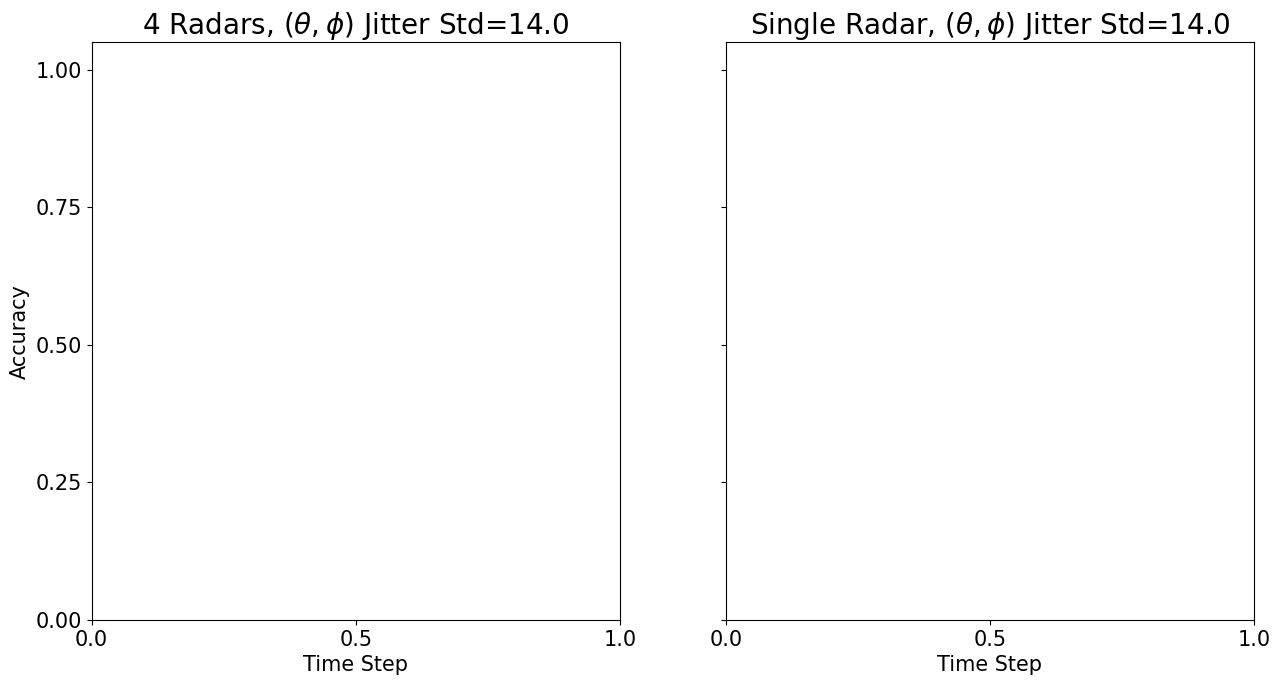

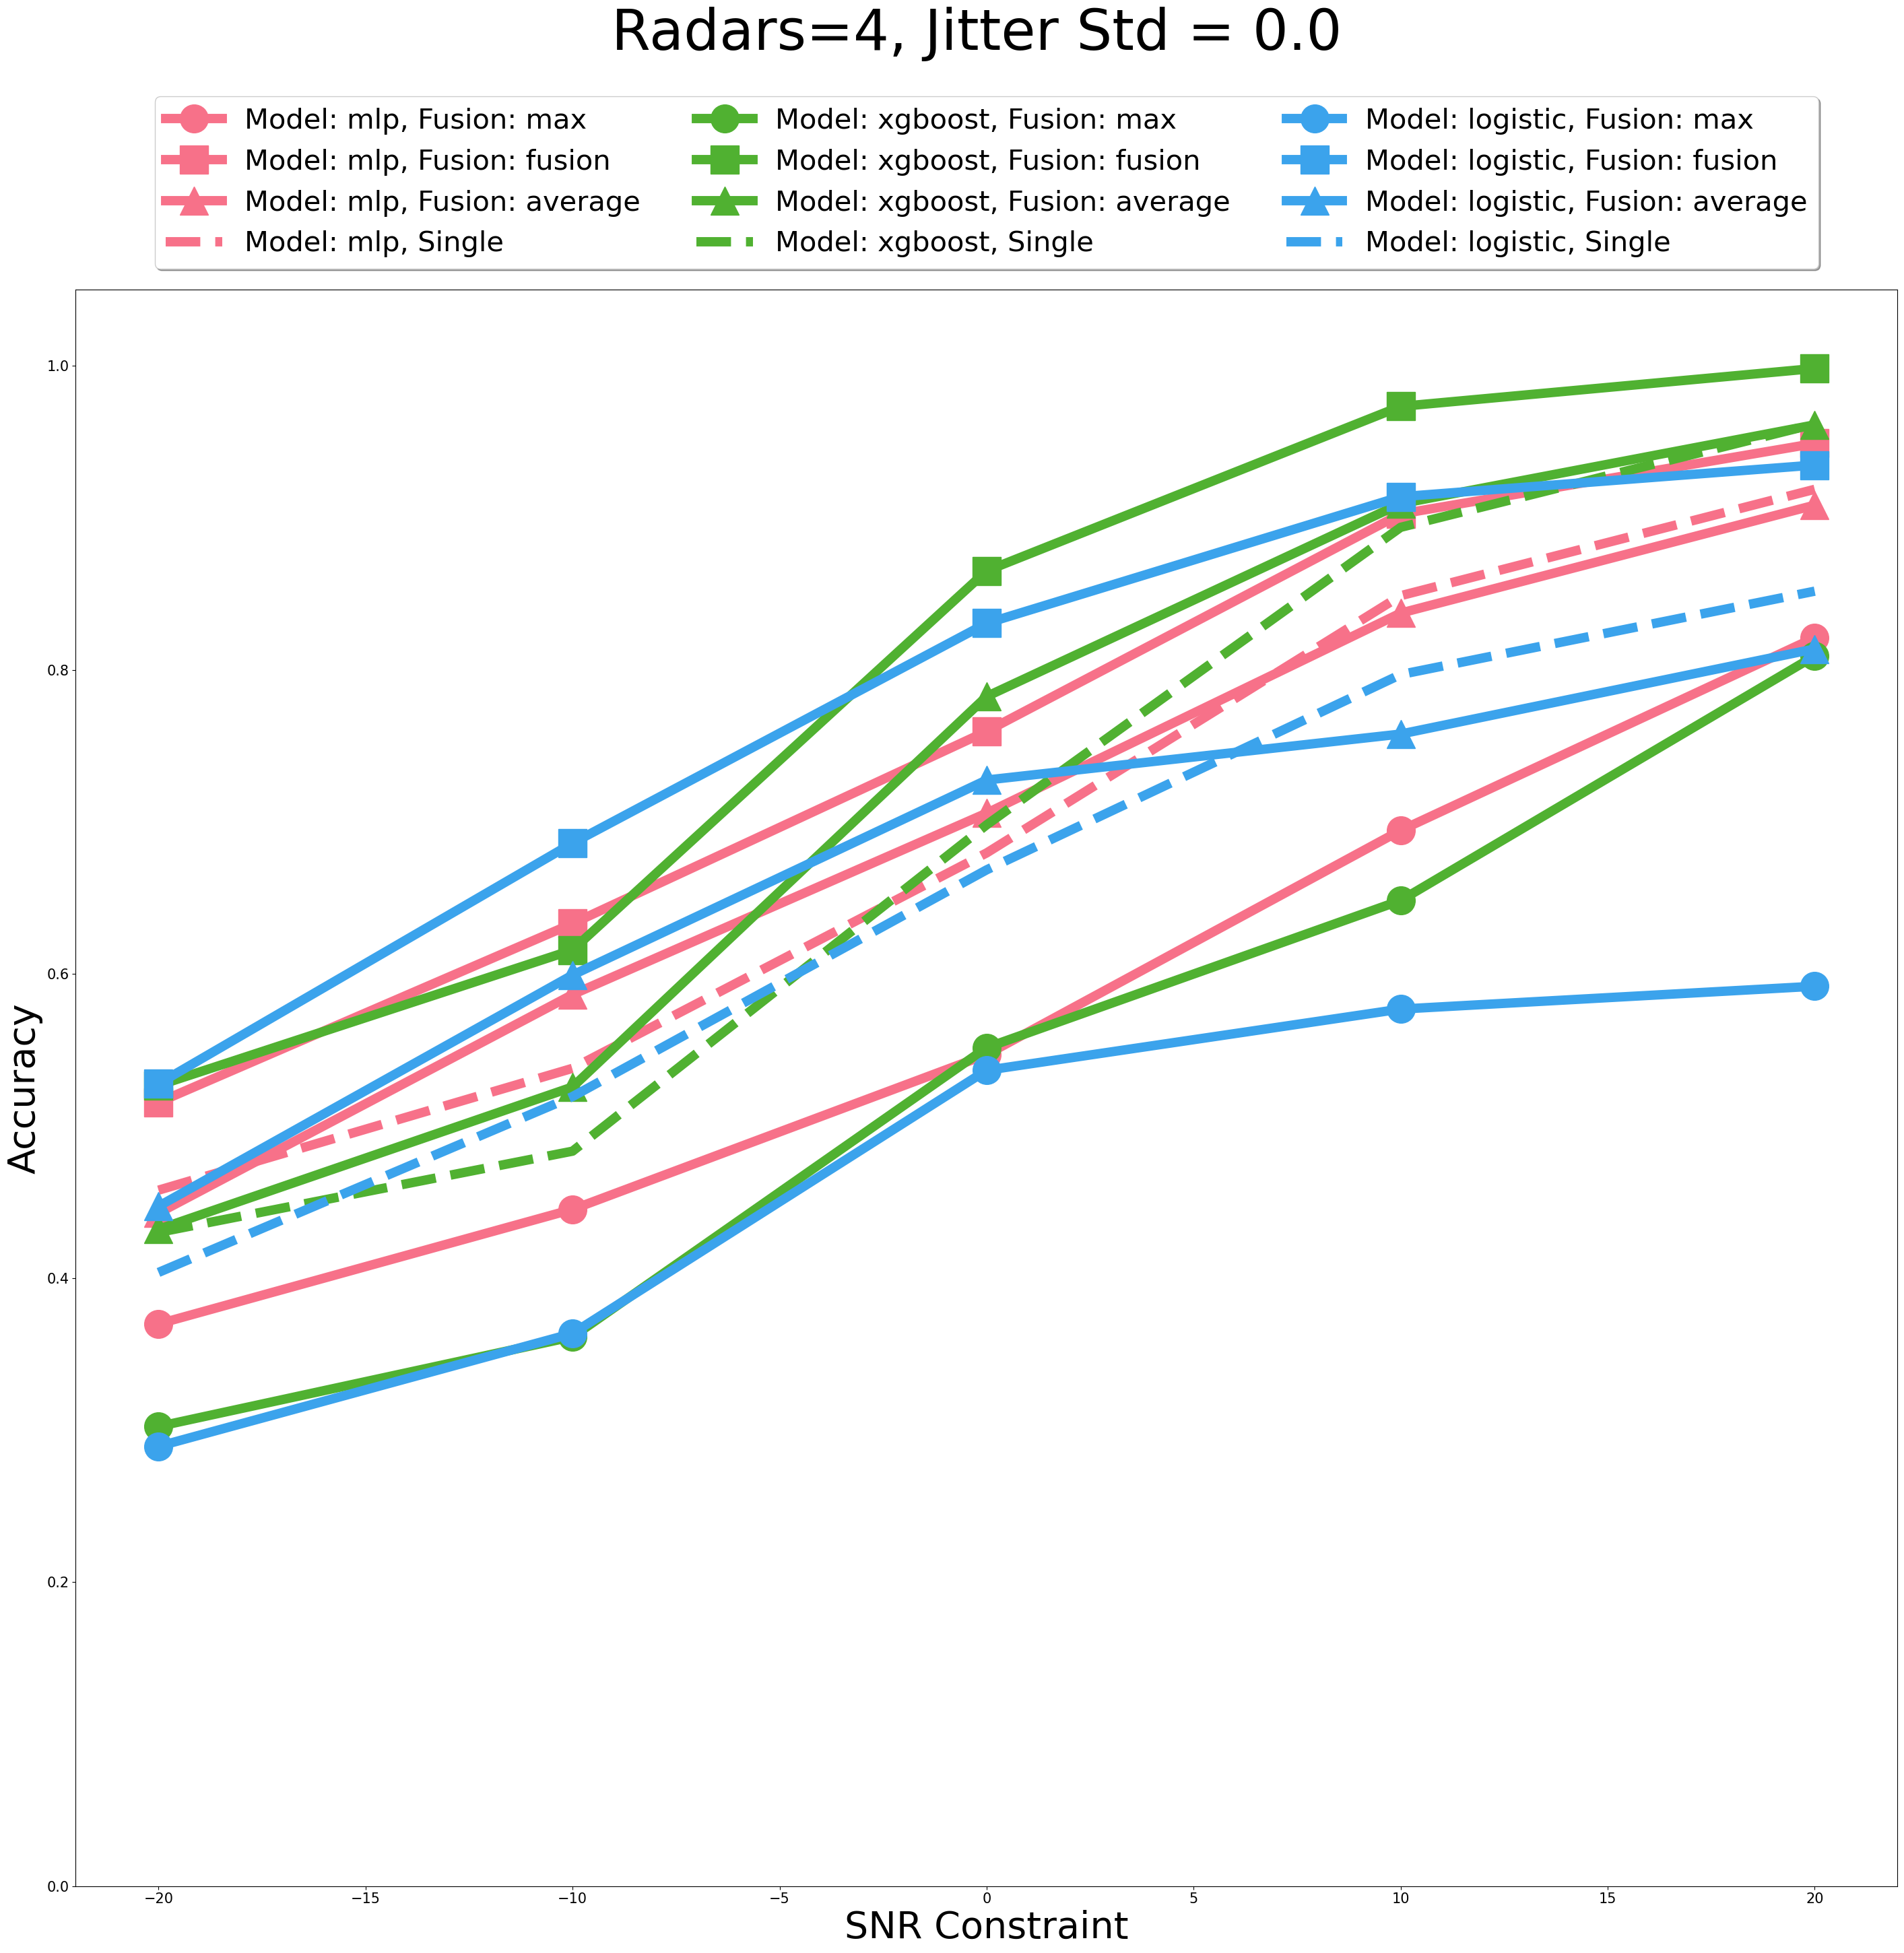

In [55]:
Jitter_filter = 50
N_radars = 4
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

unique_constraints = filtered_data['SNR_constraint'].unique()
unique_models = filtered_data['model_choice'].unique()
unique_fusion_methods = filtered_data['fusion_method'].unique()

fig, ax = plt.subplots(figsize=(30, 30))
# ax.set_aspect('equal')

SMALL_SIZE = 40
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

markers = ['o', 's', '^', 'v', 'D']
marker_dict = {fusion_method: marker for fusion_method, marker in zip(unique_fusion_methods, markers)}

colors = sns.color_palette("husl", len(unique_models))
color_dict = {model: color for model, color in zip(unique_models, colors)}

for model in unique_models:
    model_color = color_dict[model]
    for fusion_method in unique_fusion_methods:
        data_subset = filtered_data[
            (filtered_data['model_choice'] == model) &
            (filtered_data['fusion_method'] == fusion_method)
        ]
        
        data_subset = data_subset.sort_values(by="SNR_constraint")
        
        marker = marker_dict[fusion_method]
        ax.plot(
            data_subset['SNR_constraint'],  # Change x-axis to SNR
            data_subset['accuracy'],
            label=f"Model: {model}, Fusion: {fusion_method}",
            marker=marker,
            color=model_color,
            markersize=30,
            linewidth=10
        )
        
    ax.plot(
        data_subset['SNR_constraint'],  # Change x-axis to SNR
        data_subset['accuracy_single'],
        label=f"Model: {model}, Single",
        marker=None,
        color=model_color,
        markersize=30,
        linewidth=10,
        linestyle="--"
    )

ax.set_xlabel('SNR Constraint', fontsize=SMALL_SIZE)
ax.set_ylabel('Accuracy', fontsize=SMALL_SIZE)
ax.set_ylim([0,1.05])

# legend.append("Single Radar")
jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

fig.suptitle(f"Radars={N_radars}, Jitter Std = {jitter_std}",fontsize=SMALL_SIZE*1.5)

# Display the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), fancybox=True, shadow=True, ncol=3, prop={'size': SMALL_SIZE*0.75})
plt.tight_layout()
plt.savefig(os.path.join(save_folder,"accuracy_vs_snr.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Accuracy vs time step for multiple SNR

In [56]:
N_radars = 4
Jitter_filter = 0

fig.suptitle(f"Radars={N_radars}, Jitter Std = {jitter_std}",fontsize=SMALL_SIZE*2)
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

In [57]:
SMALL_SIZE = 15
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

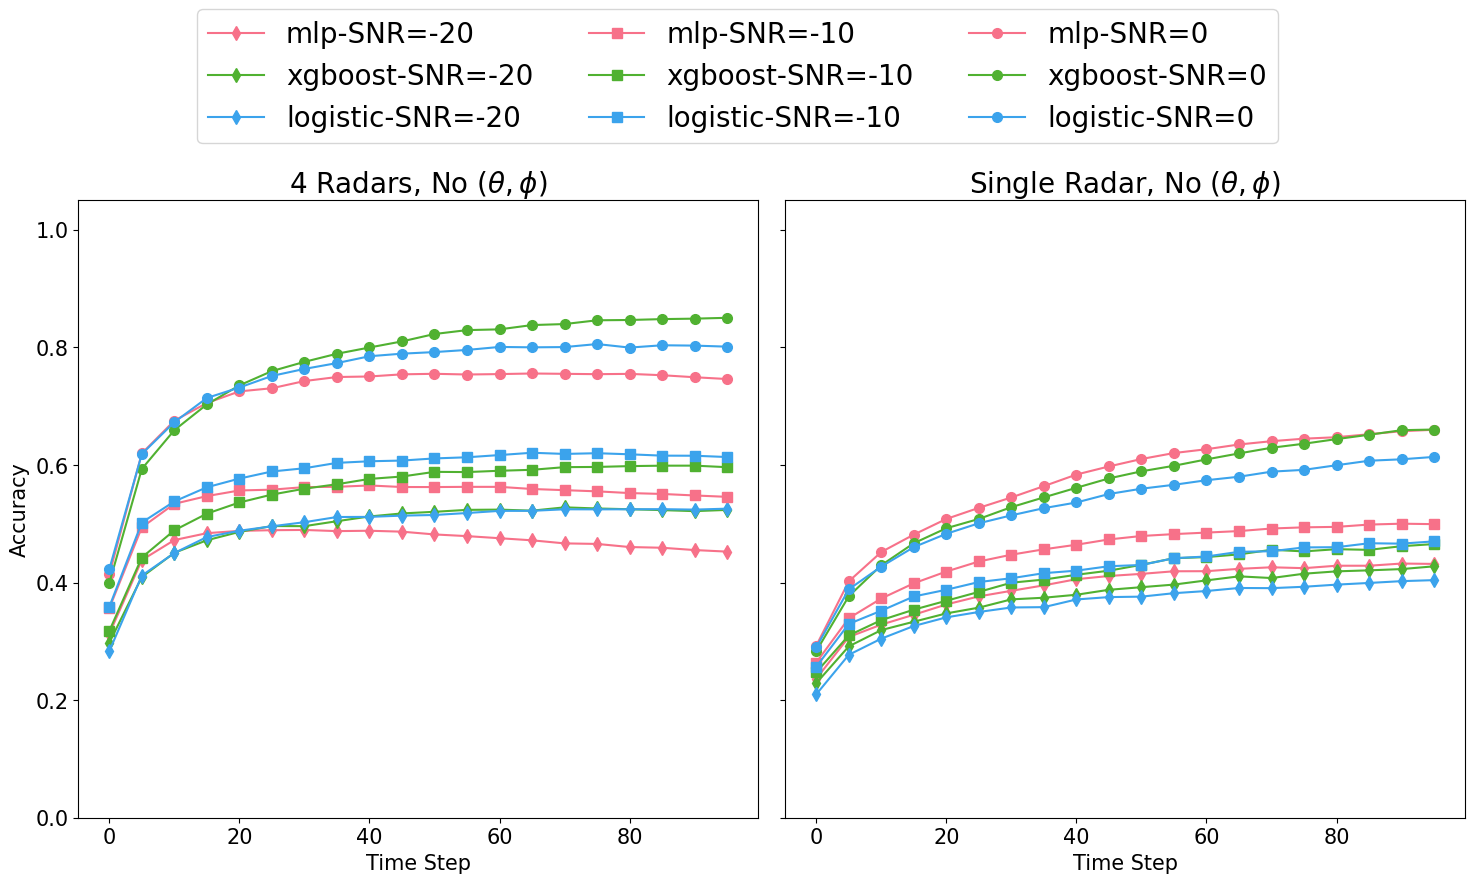

In [59]:
SNR_unique = filtered_data.SNR_constraint.unique()
Model_unique = filtered_data.model_choice.unique()
Fusion_method = ['fusion','average','max']

colors = sns.color_palette("husl", len(Model_unique))
color_dict = {model: color for model, color in zip(Model_unique, colors)}

SNR_unique = [-20,-10,0]
colors = ["blue","purple","magenta"]
markers = ["d","s","o","2","+"]
legend = []
fig,axes = plt.subplots(1,2,sharey=True,figsize=(15,7.5))
skip_every = 5
for i,SNR in enumerate(SNR_unique):
    for j,model in enumerate(Model_unique):
        temp_df = filtered_data[(filtered_data.SNR_constraint==SNR) & (filtered_data.model_choice==model) & (filtered_data.fusion_method=="fusion")]
        acc_single = eval(temp_df.accuracy_single_time.item())
        acc_fused = eval(temp_df.accuracy_time.item())
        
        axes[0].plot(np.arange(0,len(acc_fused),skip_every),acc_fused[::skip_every],marker=markers[i],markersize=7,color=color_dict[model])
        axes[1].plot(np.arange(0,len(acc_fused),skip_every),acc_single[::skip_every],marker=markers[i],markersize=7,color=color_dict[model])
        legend.append(f"{model}-SNR={SNR}")

jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

axes[0].set_xlabel("Time Step")
axes[1].set_xlabel("Time Step")
axes[0].set_ylim([0,1.05])
axes[1].set_ylim([0,1.05])
axes[0].set_ylabel("Accuracy")
# axes[0].set_title(f"{N_radars} Radars, $(\\theta,\phi)$ Jitter Std={jitter_std}",fontsize=20)
# axes[1].set_title(f"Single Radar, $(\\theta,\phi)$ Jitter Std={jitter_std}",fontsize=20)
axes[0].set_title(f"{N_radars} Radars, No $(\\theta,\phi)$",fontsize=20)
axes[1].set_title(f"Single Radar, No $(\\theta,\phi)$",fontsize=20)

fig.legend(legend,loc='upper center', bbox_to_anchor=(.5, 1.2),fontsize=20, ncol=len(Model_unique))
plt.tight_layout()

plt.savefig(os.path.join(save_folder,"accuracy_vs_snr_multi_vs_single.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Acc vs Fusion Method

In [25]:
N_radars = 4
Jitter_filter = 50.
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

In [26]:
SMALL_SIZE = 70
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

In [27]:
len(SNR_unique)

3

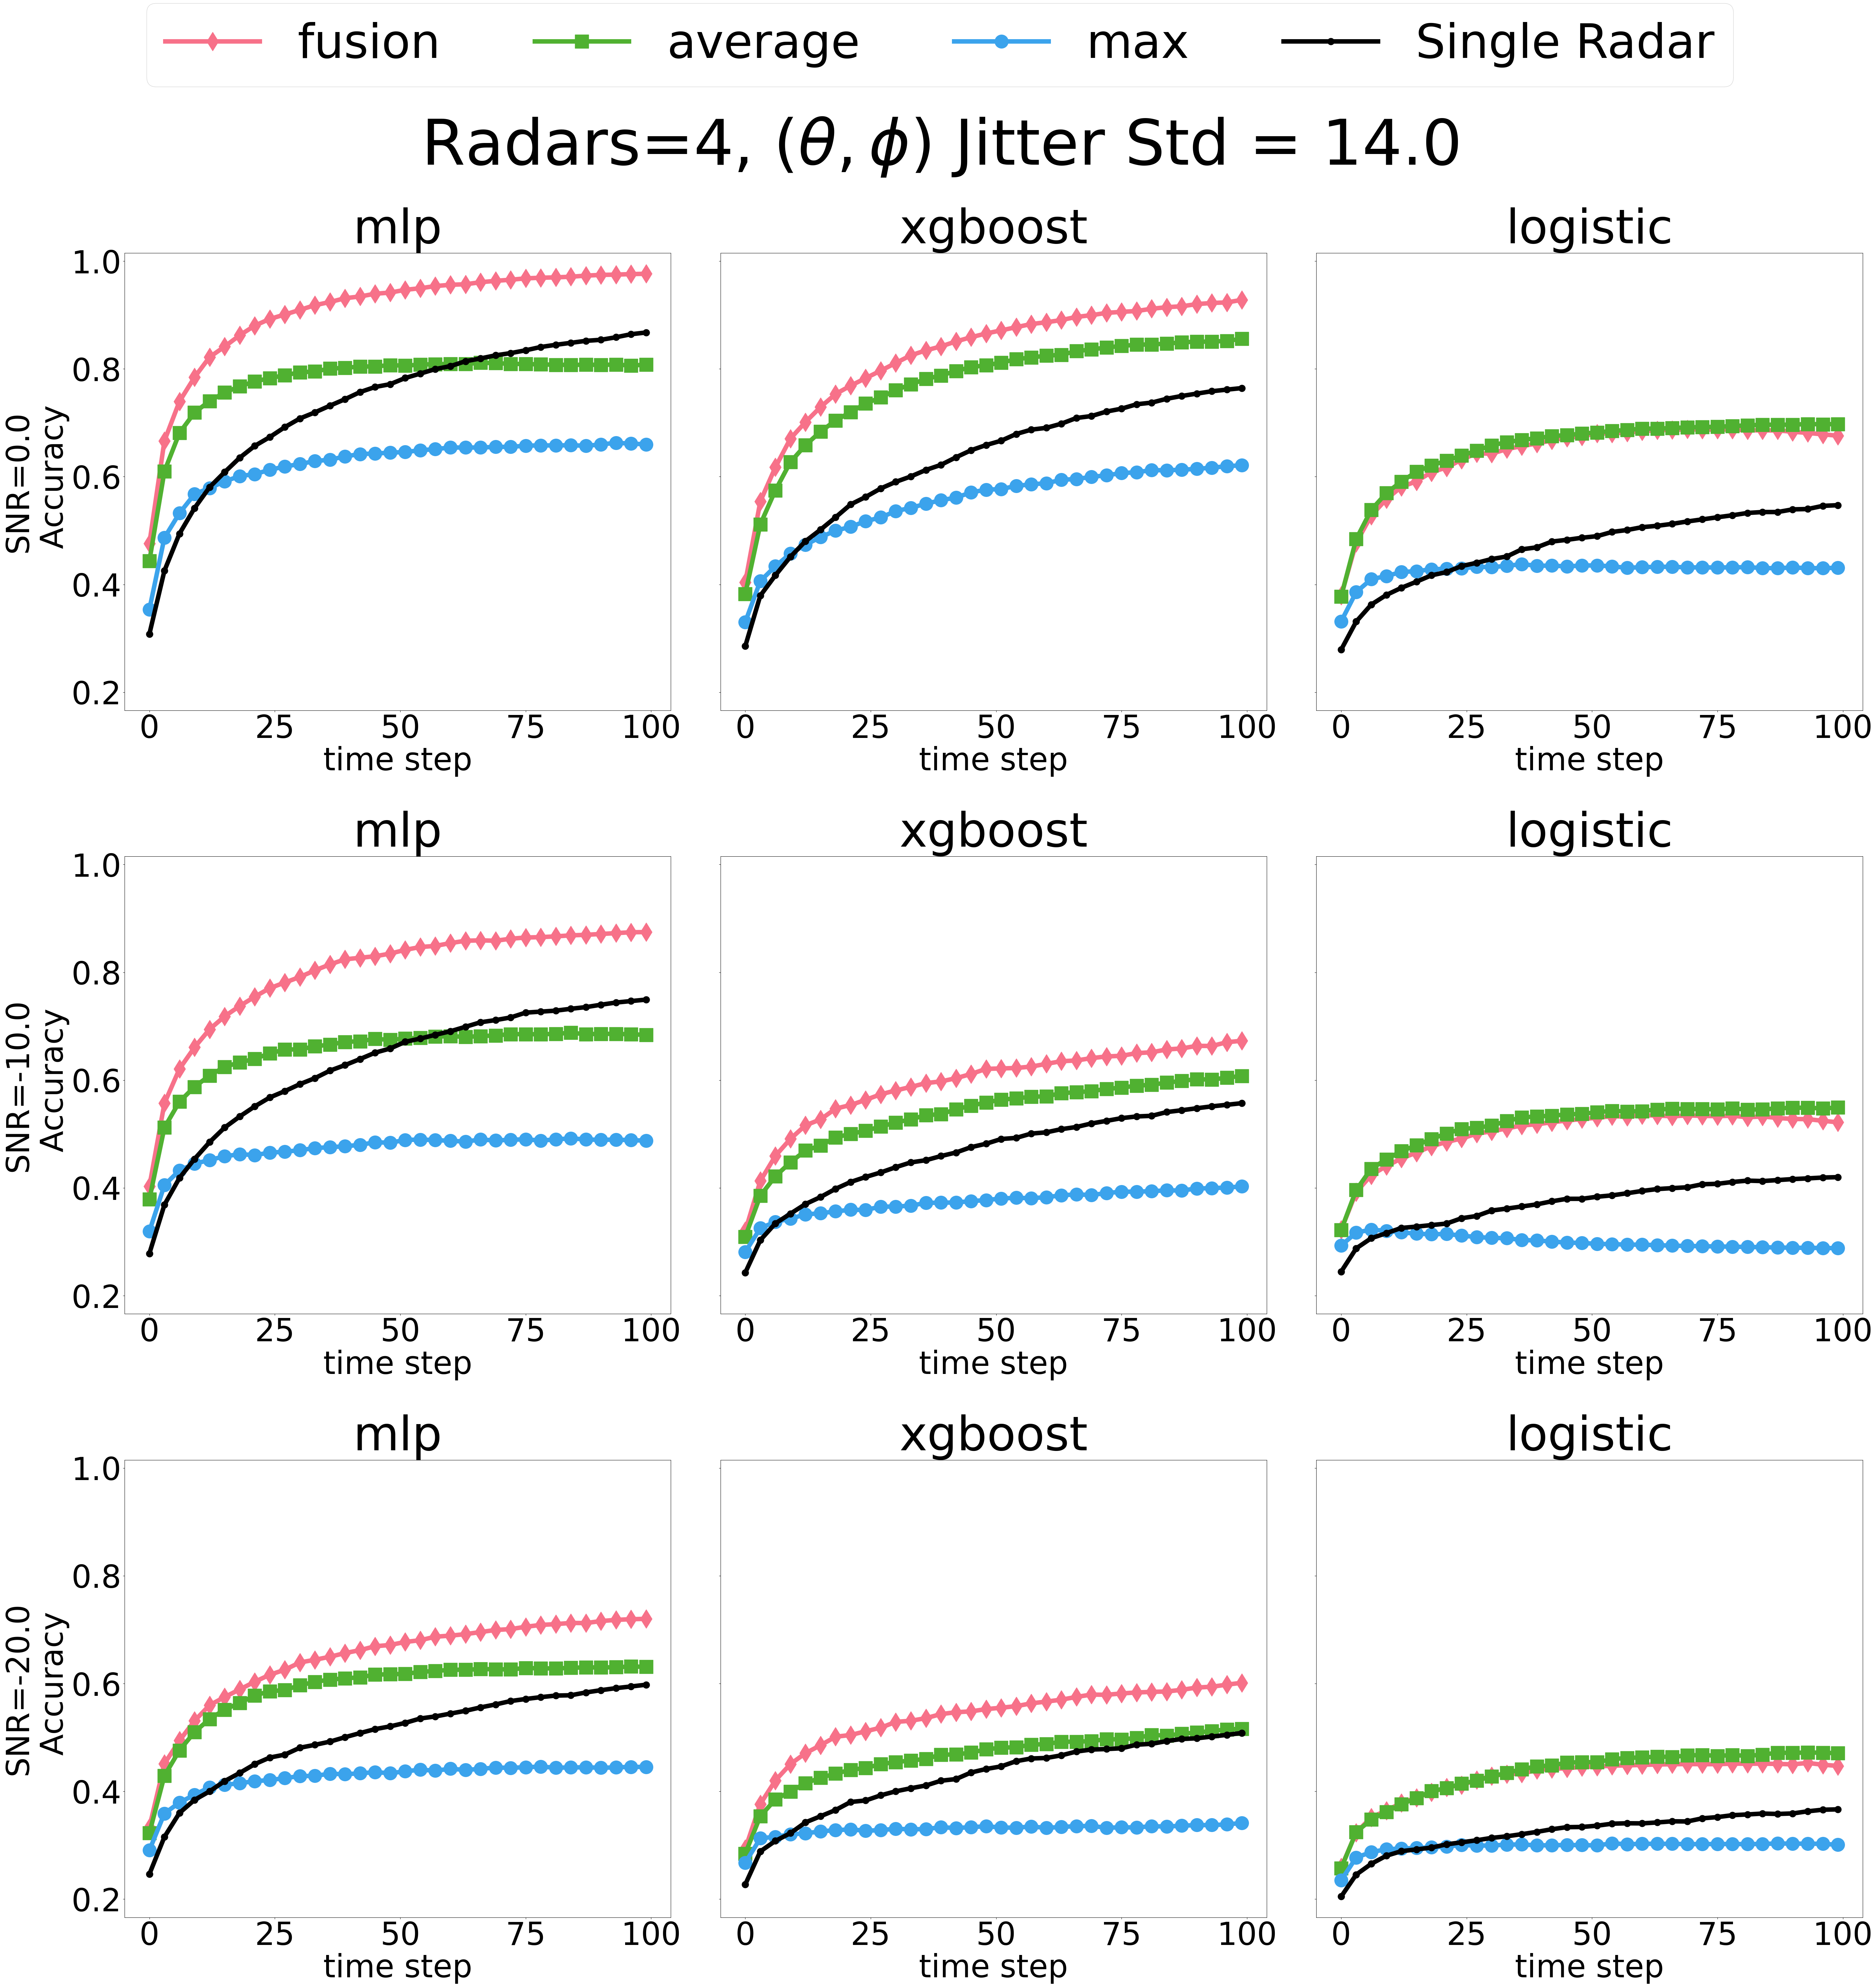

In [30]:
SNR_unique = sorted(filtered_data.SNR_constraint.unique())[::-1]
Model_unique = filtered_data.model_choice.unique()
Fusion_method = ['fusion','average','max']

colors = sns.color_palette("husl", len(Model_unique))
color_dict = {fuse: color for fuse, color in zip(Fusion_method, colors)}

markers = ["d","s","o","2","+"]
legend = []
fig,axes = plt.subplots(len(SNR_unique),len(Model_unique),figsize=(len(Model_unique)*20,len(SNR_unique)*20),sharey=True)
skip_every = 3

for k,snr in enumerate(SNR_unique):
    for i,model in enumerate(Model_unique):
        for j,fusion_method in enumerate(Fusion_method):
            temp_df = filtered_data[(filtered_data.SNR_constraint==snr) & (filtered_data.model_choice==model) & (filtered_data.fusion_method==fusion_method)]

            acc_fused = eval(temp_df.accuracy_time.item())
            acc_single = eval(temp_df.accuracy_single_time.item())

            axes[k,i].plot(np.arange(0,len(acc_fused),skip_every),acc_fused[::skip_every],marker=markers[j],markersize=30,color=color_dict[fusion_method],linewidth=10)
            axes[k,i].set_title(f"{model}",fontsize=SMALL_SIZE*1.5)

            if (k == 0) and (i==0):
                legend.append(f"{fusion_method}")
            
            if (j==0) and (i == 0):
                axes[k,i].set_ylabel(f"SNR={snr}\n Accuracy")
                
        axes[k,i].plot(np.arange(0,len(acc_fused),skip_every),acc_single[::skip_every],marker=".",markersize=30,color="k",linewidth=10)
        axes[k,i].set_xlabel("time step")

legend.append("Single Radar")
jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

fig.legend(legend,loc='upper center', bbox_to_anchor=(.5, 1.05),fontsize=SMALL_SIZE*1.5, ncol=len(Model_unique)+1)
fig.suptitle(f"Radars={N_radars}, $(\\theta,\phi)$ Jitter Std = {jitter_std}",fontsize=SMALL_SIZE*2)
plt.tight_layout()
plt.savefig(os.path.join(save_folder,"accuracy_vs_snr_multi.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Number of radars vs accuracy

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [18]:
SMALL_SIZE = 200
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.0)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

In [19]:
# Assuming 'df' is your DataFrame containing the data

# Filtering the DataFrame based on the given conditions
filtered_data = df[
    (df['fusion_method'] == 'fusion') &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    (df["elevation_jitter_width"] == 0.0)
]

# Set the index to 'model_choice' and 'n_radars'
filtered_data.set_index(['model_choice', 'n_radars'], inplace=True)


filtered_data[filtered_data['SNR_constraint'] == -20]["accuracy"].sort_index()

model_choice  n_radars
logistic      4.0         0.460329
              16.0        0.541864
              64.0        0.573650
mlp           4.0         0.852921
              16.0        0.863071
              64.0        0.864786
xgboost       4.0         0.623829
              16.0        0.602493
              64.0        0.584386
Name: accuracy, dtype: float64

In [20]:
# Assuming 'df' is your DataFrame containing the data

# Filtering the DataFrame based on the given conditions
jitter_filter = 50
filtered_data = df[
    (df['fusion_method'] == 'fusion') &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    (df["elevation_jitter_width"] == jitter_filter)
]

# Set the index to 'model_choice' and 'n_radars'
filtered_data.set_index(['model_choice', 'n_radars'], inplace=True)

# Get unique SNR_constraint values
unique_snr_values = sorted(filtered_data['SNR_constraint'].unique())

# Assign unique colors to each model
models = filtered_data.index.get_level_values('model_choice').unique()

colors = sns.color_palette("husl", len(models))
color_dict = {model: color for model, color in zip(models, colors)}

markers = ["d","s","o","2","+"]

fig, axs = plt.subplots(1,len(unique_snr_values), figsize=(60*len(unique_snr_values), 60))

legend_dict = {}  # Dictionary to store unique legend items

for i, snr_value in enumerate(unique_snr_values):
    snr_filtered_data = filtered_data[filtered_data['SNR_constraint'] == snr_value]

    # Plotting number of radars vs. accuracy for each model
    ax = axs[i]
    for model in sorted(models):  # Sort models alphabetically
        model_data = snr_filtered_data.loc[model]
        model_data = model_data.sort_values('n_radars')  # Sort by number of radars
        color = color_dict[model]

        line1 = ax.plot([1] + model_data.index.astype(int).tolist(), [model_data['accuracy_single'].mean()] + model_data['accuracy'].tolist(), marker='o', linestyle='-', label=f'{model} - accuracy', color=color,linewidth=SMALL_SIZE/3,markersize=SMALL_SIZE*0.9)
#         line2 = ax.plot(model_data.index, model_data['accuracy_single'], marker='o', linestyle='--', label=f'{model} - accuracy_single', color=color,linewidth=SMALL_SIZE/3,markersize=SMALL_SIZE/3)

        # Collect unique legend items
        if f'{model} - accuracy' not in legend_dict:
            legend_dict[f'{model} - accuracy'] = line1[0]

    ax.set_xlabel('Number of Radars',fontsize=SMALL_SIZE)
    ax.set_ylabel('Accuracy',fontsize=SMALL_SIZE)
    ax.set_title(f'(SNR Constraint: {snr_value})',fontsize=SMALL_SIZE)
    ax.grid(True,linewidth=SMALL_SIZE/5)
    ax.set_xscale("log")
    ax.set_ylim(0, 1.05)  # Set y-axis limits

jitter_std = np.round(np.sqrt((jitter_filter)**2 / 12))
fig.suptitle(f"Accuracy vs Number of Radars: $(\\theta,\phi)$ Jitter Std={jitter_std}",fontsize=SMALL_SIZE)
# Create a single legend at the top of the figure using unique legend items
fig.legend(legend_dict.values(), legend_dict.keys(), loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=len(models),fontsize=SMALL_SIZE*0.96)
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust subplot layout
plt.savefig(os.path.join(save_folder,"accuracy_vs_num_radars.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Combine accuracy vs jitter

In [ ]:
snr_value

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Assuming 'df' is your DataFrame containing the data

# Filtering the DataFrame based on the given conditions
filtered_data = df[
    (df['n_radars'] == 20) &
    (df['fusion_method'] == 'max') &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000)
]

# Combine elevation and azimuth jitter widths
filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)

# Get unique SNR_constraint values
unique_snr_values = filtered_data['SNR_constraint'].unique()

# Assign colors to each unique model
models = sorted(filtered_data['model_choice'].unique())
colors = plt.cm.tab10.colors[:len(models)]  # Using a colormap with sufficient distinct colors
model_color_dict = {model: color for model, color in zip(models, colors)}

# Plotting for each unique SNR_constraint value
for snr_value in unique_snr_values:
    snr_filtered_data = filtered_data[filtered_data['SNR_constraint'] == snr_value]
    
    # Sort the data by combined jitter width
    snr_filtered_data = snr_filtered_data.sort_values(by='combined_jitter_width')
    
    plt.figure(figsize=(8, 6))
    
    for model in models:
        model_data = snr_filtered_data[snr_filtered_data['model_choice'] == model]
        color = model_color_dict[model]  # Get the color for the current model
        
        plt.plot(model_data['combined_jitter_width'], model_data['accuracy'], marker='o', linestyle='-', label=f'{model} - accuracy', color=color)
        
        # Overlay single accuracy onto the plot
        plt.plot(model_data['combined_jitter_width'], model_data['accuracy_single'], marker='o', linestyle='--', label=f'{model} - accuracy_single', color=color)

    plt.xlabel('Combined Jitter Width')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Combined Jitter Width (SNR Constraint: {snr_value})')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    
    # Create a single legend for all plots with consistent colors for each model
    plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=len(models), fontsize='small')
    
    plt.grid(True)
    plt.ylim([0, 1])
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
# Assuming 'df' is your DataFrame containing the data

# Filtering the DataFrame based on the given conditions
filtered_data = df[
    (df['fusion_method'] == 'fusion') &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000)
]

# Combine elevation and azimuth jitter widths
filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)

# Set the index to 'model_choice' and 'n_radars'
filtered_data.set_index(['model_choice', 'n_radars'], inplace=True)

# Get unique SNR_constraint values
unique_snr_values = filtered_data['SNR_constraint'].unique()

# Assign unique colors to each model
models = filtered_data.index.get_level_values('model_choice').unique()
colors = plt.cm.get_cmap('tab10', len(models))  # Get a colormap with a color for each model
model_color_dict = {model: colors(i) for i, model in enumerate(models)}

# Create a single plot for both elevation and azimuth jitter widths
unique_jitter_widths = np.sort(filtered_data["azimuth_jitter_width"].unique())

fig, axs = plt.subplots(len(unique_snr_values), len(unique_jitter_widths), figsize=(14, 6 * len(unique_snr_values)))

legend_dict = {}  # Dictionary to store unique legend items

for i, snr_value in enumerate(unique_snr_values):
    snr_filtered_data = filtered_data[filtered_data['SNR_constraint'] == snr_value]

    for idx, jitter_width in enumerate(unique_jitter_widths):
        # Plotting number of radars vs. accuracy for each model
        ax = axs[i, idx]
        for model in sorted(models):  # Sort models alphabetically
            model_data = snr_filtered_data.loc[model]
            model_data = model_data.loc[model_data.azimuth_jitter_width == jitter_width]  # Filtering for each model
            model_data = model_data.sort_values('n_radars')  # Sort by number of radars
            color = model_color_dict[model]
            
            line1 = ax.plot(model_data.index, model_data['accuracy'], marker='o', linestyle='-', label=f'{model} - accuracy', color=color)
            line2 = ax.plot(model_data.index, model_data['accuracy_single'], marker='o', linestyle='--', label=f'{model} - accuracy_single', color=color)
            
            # Collect unique legend items
            if f'{model} - accuracy' not in legend_dict:
                legend_dict[f'{model} - accuracy'] = line1[0]
            if f'{model} - accuracy_single' not in legend_dict:
                legend_dict[f'{model} - accuracy_single'] = line2[0]

        ax.set_xlabel('Number of Radars')
        ax.set_ylabel('Accuracy')
        ax.set_title(f'Accuracy vs Number of Radars\n(SNR Constraint: {snr_value}, Jitter Width: {jitter_width})')
        ax.grid(True)
        ax.set_ylim(0, 1.05)  # Set y-axis limits

# Create a single legend at the top of the figure using unique legend items
fig.legend(legend_dict.values(), legend_dict.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=len(models), fontsize='small')
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust subplot layout
plt.show()